<a href="https://colab.research.google.com/github/trDalmi/Rainfall-Prediction-/blob/main/Rainfall_Prediction_in_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall in Australia

Implementation of Logistic Regression with Python and Scikit-Learn to build a classifier to predict whether or not it will rain tommorow in Australia. Training a binary classification model using Logistic Regresssion.

## Table of Contents:
The table of contents for this project is as follow:-

1. The Problem Statement
2. Import Libraries
3. Import Dataset
4. Exploratory Data Analysis
*   4.1 View dimensions of dataset
*   4.2 Preview the dataset
*   4.3 View column names
*   4.4 Drop variables
*   4.5 View summary of dataset
*   4.6 View statistical properties of datset

5. Univariate Anaysis.
*   5.1 Explore RainTommorow target variable.
*   5.2 Finding of Univariate Analysis.
6. Bivariate Analysis
*   6.1 Types of varibles
*   6.2 Explore Categorical variables
*   6.3 Summary of Categorical variables.
*   6.4 Explore problems within categorical varibales.
*   6.5 Explore numerical variables.
*   6.6 Summary of numerical variables.
*   6.7 Exolore problems within numerical variables.
7. Multivariate Analysis.
*   7.1 Heat Map
*   7.2 Pair Plot.
8. Declare feature vector and target variable
9. Split data into trainig and test set.
10. Feature Engineering
*   10.1 Engineering missing values in numerical variables.
*   10.2 Engineering missing values in categorical variables.
*   10.3 Engineering outliers in numerical variables.
*   10.4 Encode categorical variables.
11. Feature Scaling
12. Model training
13. Predict results
14. Check accuracy score
*   14.1 Compare train-set and test-set accuracy.
*   14.2 Check for overfitting and underfitting
*   14.3 Compare model accuracy with null accuracy.
15. Confusion Matrix
16. Classification metrices.
*   16.1 Classification report
*   16.2 Classification accuracy.
*   16.3 Classification error.
*   16.4 Precision
*   16.5 Recall
*   16.6 True Positive Rate
*   16.7 False Positive Rate
*   16.8 Specificity
*   16.9 f1-score
*   16.10 Support
17. Adjust the threshold level.
18. ROC-AUC
19. Recursive Feature Elimination with cross(RFECV)
20. k-Fold Cross-Validation
21. Hyperparameter Optimization using GridSearch CV
22. Result and Conclusion
23. References.


















## 1. The Problem Statement

In this project, we will try to answer the question that whether or not it will rain tommorow in Australia.
We will implement Logistic Regression with Python and Scikit-Learn

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.
## 2. Import Librabies
The first step in building the model is to import the necessary libraries.

In [1]:
import numpy as np # LINEAR ALGEBRA
import pandas as pd # DATA PROCESSING, CSV FILE I/O

# importing libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Import Dataset
The next step is to import the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/drive/MyDrive/Datasets/weatherAUS.csv"
df = pd.read_csv(file_path)

## 4. Exploratory data analysis
*   We have imported the data.
*   Now, it time to explore the data to gain insights about it.

### View Dimesions of dataset



In [4]:
df.shape

(142193, 24)

We can see that the data contains 142193 instances and 24 variables in the dataset.
### Preview the dataset.

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### View Column names

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

This dataset contains detailed meteorological information recorded in Albury, Australia, for a specific period. It includes 24 attributes for each day, capturing various aspects of weather. These attributes include:


*   DATE : The date of the weather observation.
*   Location: The location where the observation was made.
*   MinTemp: Minimum temperature of the day (in degree Celsius)
*   MaxTemp: Maximum temperature of the day (in degree Celsius)
*   Rainfall: Total rain recorded for the day in mm.
*   Evapration: Total evaporation recorded for the day in mm.
*   Sunshine: Total hours of sunshine recorded for the day.
*   WindGustDir: The direction of the strongest wind gust during the day.
*   WindGustSpeed: The speed of the strongest wind gust during the day.
*   WindDir9am: The wind direction at 9am.
*   WindDir3pm: The wind direction at 3pm.
*   WindSpeed9am: The wind speed at 9am (in kilometers per hours).
*   WindSpeed3pm: The wind speed at 3pm (in kilometers per hours).
*   Humidity9am: The humidity level at 9am (percentage)
*   Humidity3pm: The humidity level at 3pm (percentage)
*   Cloud9am: The cloud cover at 9am (measured in oktas).
*   Cloud3pm: The cloud cover at 3pm (measured in oktas).
*   Temp9am: The temperature at 9am (in degree Celsius).
*   Temp3pm: The temperature at 3pm (in degree Celsius).
*   RainToday: Indicator of whether it rainged today (YES or NO).
*   RISK_MM: The amount of rain(in millimeters) recorded for the next day.
*   RainTomorrow: Indicator of whether it rained the next day (Yes or NO).'

This dataset provides comprehensive insights into daily weather patterns and variations, aiding in climate analysis and prediction.





In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

#### Comment:
*   We can see that the dataset contains mixture of categorical and numerical values.
*   Categorical variables have data type **Object**.
*   Numerical variables have data type **Float64**.
*   Also, there are some missing values in the dataset as all the  attributes does not have the same count of values.

Counting the null values for each attributes:



In [8]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


look at null values. (as we can see the dataframe has a lot of null values)

### View Statistical Properties of dataset.

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


#### Important points to note:
*   The above commad df.describe() helps us to view the statistical properties of numerical variables. It excludes character variables.
*   If we want to view the statistical properties of character variables, we should run the following command-
    df.describe(include = ['object'])
*   If we want to view the statistical properties of all the variables, we should run the following command-
    df.describe(include = "all")


In [10]:
df.describe(include = "all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,142193,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,...,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,2013-12-01,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No
freq,49,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109332,NaN,110316
mean,NaN,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,...,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN
std,NaN,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,...,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,...,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,...,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN
75%,NaN,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN


# 5. Univariate Analysis
#### Explore **RainTomorrow** target variable
Check for missing values

In [11]:
df['RainTomorrow'].isnull().sum()

0

We can see that there are no missing values in the RainTomorrow target variable.
#### View the number of unique values.

In [12]:
df['RainTomorrow'].nunique()

2

#### View the unique values.

In [13]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

We can see that the number of unique values in RainTommorow varibale is 2. And they are YES and NO.
#### View the frequency distribution of values.

In [14]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


#### View percentage of frequency distribution of values.

In [15]:
df['RainTomorrow'].value_counts()/len(df)

,count
RainTomorrow,
No,0.775819
Yes,0.224181


#### Comment
*  We can see that out of the total number of RainTomorrow vlaues, NO appears 77.58% times and YES appears 22.42% times.

?? Can we say that the data is unbalanced and will make biased predictions.

<ipython-input-16-b4872c9bddfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['RainTomorrow'],palette = "Set1")


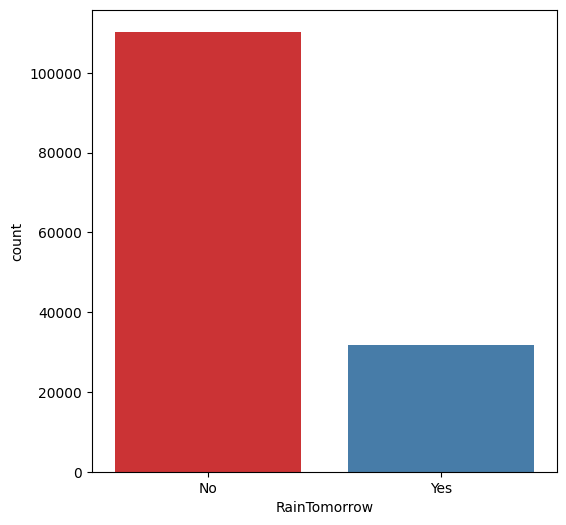

In [16]:
plt.figure(figsize = (6,6))
sns.countplot(x = df['RainTomorrow'],palette = "Set1")
plt.show()

#### Interpretation
*  The above univariate plot confirms our findings that-
  *  The NO variable have 110316 entries, and
  * The Yes variable have 31877 entries.

Henceforth we can say that the the data is unbalanced.

### Findings of Univariate Analysis:
*  The number of unique values in RainTomorrow variable is 2.

*  The two unique values are No and Yes.

*  Out of the total number of RainTomorrow values, No appears 77.58% times and Yes appears 22.42% times.

*  The univariate plot confirms our findings that –

   * The No variable have 110316 entries, and

  * The Yes variable have 31877 entries.

# 6. Bivariate Analysis

### Types of Varibales

In this section, We will segregate the dataset into categorical and numerical variables. There are a micture of categorical and numerical varibales in the dataset. Categorical varibale have data type object. Numerical varibales have data type float64.

First of all, I will find the cateforical varibales.



#### Explore Catergorical Variables

In [17]:
categorical = [var for var in df.columns if df[var].dtype == 'object']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [18]:
# View the categorical varibales
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


#### Summary of categorical varibales
*  There is a date varibale. It is denoted by Date column.
*  There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, and RainTomorrow.
*  There are two binary categorical varibales - RainToday and RainTomorrow.
*  RainTomorrow is the target variable.

#### Explore the problems within categorical variables
First, I will explore the categorical variables.
#### Missing values in categorical variables

In [19]:
# Check the missing values in categorical variables
df[categorical].isnull().sum()

,0
Date,0
Location,0
WindGustDir,9330
WindDir9am,10013
WindDir3pm,3778
RainToday,1406
RainTomorrow,0


In [20]:
# Print categorical variables containing missing values
cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


We can see that there are only 4 categorical varibales in dataset which contains missing values. These are WindGustDir, WindDir9am, WindDir3pm, and RainToday.

#### Frequency count of categorical variables.
Now, lets check the frequenct counts of categorical varibales.

In [21]:
for var in categorical:
  print(df[var].value_counts())

Date
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith  

In [22]:
# view frequency distribution of categorical variables
for var in categorical:
  print(df[var].value_counts()/(len(df)))

Date
2013-12-01    0.000345
2014-01-09    0.000345
2014-01-11    0.000345
2014-01-12    0.000345
2014-01-13    0.000345
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.024038
Sydney              0.023468
Perth               0.022455
Darwin              0.022448
Hobart              0.022420
Brisbane            0.022230
Adelaide            0.021731
Bendigo             0.021337
Townsville          0.021330
AliceSprings        0.021316
MountGambier        0.021309
Launceston          0.021295
Ballarat            0.021295
Albany              0.021211
Albury              0.021175
PerthAirport        0.021161
MelbourneAirport    0.021161
Mildura             0.021147
SydneyAirport       0.021133
Nuriootpa           0.021112
Sale                0.021098
Watsonia            0.021091
Tuggeranong         0.021084
Portland            0.02

#### Number of labels: cardinality
The number of labels within a categorical varibales is known as cardinality. A high number of labels within a varbale is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. SO, lets check for high cardinality.

In [23]:
# Check for cardinality in categorical variables
for var in categorical:
  print(var, 'contains', df[var].nunique(), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 16 labels
WindDir9am contains 16 labels
WindDir3pm contains 16 labels
RainToday contains 2 labels
RainTomorrow contains 2 labels


We can see that there is a **Date** variable which needs to be preprocesses. I will do preprocessing in the following section. Here rather than consider the date as for date we will generalise it a months or week more minised lens.


All the other variables contain relatively smaller number of variables.

## Feature Engineering of Date variable

In [24]:
df['Date'].dtype

dtype('O')

We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.

In [25]:
# parse the dates, currently coded as strings, into datitme format
df['Date'] = pd.to_datetime(df['Date'])

In [26]:
# extract year from the date
df['Year'] = df['Date'].dt.year.astype(np.float64)
df['Year'].head()

,Year
0,2008.0
1,2008.0
2,2008.0
3,2008.0
4,2008.0


In [27]:
# Extracting Month from the date
df['Month'] = df['Date'].dt.month.astype(np.float64)
df['Month'].head()

,Month
0,12.0
1,12.0
2,12.0
3,12.0
4,12.0


In [28]:
# Extracting Day from the date
df['Day'] = df['Date'].dt.day.astype(np.float64)
df['Day'].head()

,Day
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

We can see that there are three additional columns created from the Date variable. Now, I will drop the original Date variable from the dataset

In [30]:
df.drop('Date', axis =1 , inplace = True)
df.describe(include = 'all')

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
count,142193,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132863,132923.000000,132180,138415,...,88536.000000,85099.000000,141289.000000,139467.000000,140787,142193.000000,142193,142193.000000,142193.000000,142193.000000
unique,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,...,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN
top,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,...,NaN,NaN,NaN,NaN,No,NaN,No,NaN,NaN,NaN
freq,3418,NaN,NaN,NaN,NaN,NaN,9780,NaN,11393,10663,...,NaN,NaN,NaN,NaN,109332,NaN,110316,NaN,NaN,NaN
mean,NaN,12.186400,23.226784,2.349974,5.469824,7.624853,NaN,39.984292,NaN,NaN,...,4.437189,4.503167,16.987509,21.687235,NaN,2.360682,NaN,2012.758926,6.402544,15.715084
std,NaN,6.403283,7.117618,8.465173,4.188537,3.781525,NaN,13.588801,NaN,NaN,...,2.887016,2.720633,6.492838,6.937594,NaN,8.477969,NaN,2.541256,3.426506,8.798150
min,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,...,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,NaN,2007.000000,1.000000,1.000000
25%,NaN,7.600000,17.900000,0.000000,2.600000,4.900000,NaN,31.000000,NaN,NaN,...,1.000000,2.000000,12.300000,16.600000,NaN,0.000000,NaN,2011.000000,3.000000,8.000000
50%,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,NaN,...,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,NaN,2013.000000,6.000000,16.000000
75%,NaN,16.800000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,...,7.000000,7.000000,21.600000,26.400000,NaN,0.800000,NaN,2015.000000,9.000000,23.000000


Now, we can see that the Date variable has been removed from the dataset.

### Explore Categorical Variables one by one
Now, I will explore the categorical varibales one by one.

In [31]:
# fin categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'object']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 6 categorical variables

The categorical variables are :

 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical varibales in the dataset. The Date varibale has been removes. First, I will check missing values in categorical varibales.

In [32]:
df[categorical].isnull().sum()

,0
Location,0
WindGustDir,9330
WindDir9am,10013
WindDir3pm,3778
RainToday,1406
RainTomorrow,0


We can see that WindGustDir, WindDir9am, WindDir3pm, RainToday variables contain missing values. I will explore these variables one by one.

### Explore Location variable

In [33]:
# print the lables of the location variables
df['Location'].nunique()

49

There are 49 different labels in the location. lets see what are those:


In [34]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [35]:
df['Location'].value_counts()

,count
Location,
Canberra,3418
Sydney,3337
Perth,3193
Darwin,3192
Hobart,3188
Brisbane,3161
Adelaide,3090
Bendigo,3034
Townsville,3033


In [36]:
df.Location.isna().sum()

0

we can see that there are no missing values in the Location variables

In [37]:
df['WindGustDir'].nunique()

16

There are 16 different wind gust direction in the dataframe which are as follows:

In [38]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

In [39]:
df['WindGustDir'].value_counts()

,count
WindGustDir,
W,9780
SE,9309
E,9071
N,9033
SSE,8993
S,8949
WSW,8901
SW,8797
SSW,8610


In [40]:
df.WindGustDir.isna().sum()

9330

There are 9330 null values in this variable column

### One Hot Ecoding


In [41]:
# sum the number of 1s per boolean vaiable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, dummy_na = True).sum()

,0
E,9071
ENE,7992
ESE,7305
N,9033
NE,7060
NNE,6433
NNW,6561
NW,8003
S,8949
SE,9309


By doing one hot endoing and finding out the total nan values will also give us the null vlaues of the variables.

### Explore WindDir9am variable

In [42]:
df['WindDir9am'].nunique()

16

There are 16 unique values of winddir9am, those are as follows:

In [43]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [44]:
df['WindDir9am'].value_counts()

,count
WindDir9am,
N,11393
SE,9162
E,9024
SSE,8966
NW,8552
S,8493
W,8260
SW,8237
NNE,7948


In [45]:
df['WindDir9am'].isna().sum()

10013

There are 10013 null values


In [46]:
pd.get_dummies(df['WindDir9am'],dummy_na = True).sum()

,0
E,9024
ENE,7735
ESE,7558
N,11393
NE,7527
NNE,7948
NNW,7840
NW,8552
S,8493
SE,9162


### Explore WindDir3pm Variable

In [47]:
df['WindDir3pm'].nunique()

16

There are 16 lables of WindDir3pm, and those are as follows:

In [48]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [49]:
df['WindDir3pm'].value_counts()

,count
WindDir3pm,
SE,10663
W,9911
S,9598
WSW,9329
SW,9182
SSE,9142
N,8667
WNW,8656
NW,8468


In [50]:
df['WindDir3pm'].isna().sum()

3778

The above two operations can be done in one single operations using one hot encoding as follows:


In [51]:
pd.get_dummies(df['WindDir3pm'], dummy_na = True).sum()

,0
E,8342
ENE,7724
ESE,8382
N,8667
NE,8164
NNE,6444
NNW,7733
NW,8468
S,9598
SE,10663


There are 3778 null values in the WindDir3pm variable.
### Explore RainToday Variable

In [52]:
df['RainToday'].nunique()

2

In [53]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [54]:
pd.get_dummies(df['RainToday'],dummy_na = True).sum()

,0
No,109332
Yes,31455
NaN,1406


There are 1406 null vlaues in raintoday variable
### Explore RainTomorrow Variable

In [55]:
df['RainTomorrow'].nunique()

2

In [56]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
pd.get_dummies(df['RainTomorrow'],dummy_na = True).sum()

,0
No,110316
Yes,31877
NaN,0


There are no null values for the rainTomorrow variable.

## Explore Numerical Varibales

In [58]:
# Find the numerical variables
numerical = [var for var in df.columns if df[var].dtype == 'float64']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 20 numerical variables

The numerical variables are :

 ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']


In [59]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,2008.0,12.0,1.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,2008.0,12.0,2.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,2008.0,12.0,3.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0,2008.0,12.0,4.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2,2008.0,12.0,5.0


### Summary of numerical variables
* There are 16 numerical variables.
* These are given by Mintemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, and Temp3pm
* All of the numerical variables are of continuous type.
#### Explore problems within numerical varibales
Now lets explore the numerical variables.
#### Missing Values in numerical varibales

In [60]:
# Check missing values in numerical variables
df[numerical].isna().sum()

,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustSpeed,9270
WindSpeed9am,1348
WindSpeed3pm,2630
Humidity9am,1774
Humidity3pm,3610


We can see that 16 of the numerical varibales contains null vlaues

In [61]:
# View the summary statistics in numerical variables
round(df[numerical].describe(),2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
count,141556.00,141871.00,140787.00,81350.00,74377.00,132923.00,140845.00,139563.00,140419.00,138583.00,128179.00,128212.00,88536.00,85099.00,141289.00,139467.00,142193.00,142193.00,142193.00,142193.00
mean,12.19,23.23,2.35,5.47,7.62,39.98,14.00,18.64,68.84,51.48,1017.65,1015.26,4.44,4.50,16.99,21.69,2.36,2012.76,6.40,15.72
std,6.40,7.12,8.47,4.19,3.78,13.59,8.89,8.80,19.05,20.80,7.11,7.04,2.89,2.72,6.49,6.94,8.48,2.54,3.43,8.80
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,0.00,2007.00,1.00,1.00
25%,7.60,17.90,0.00,2.60,4.90,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,0.00,2011.00,3.00,8.00
50%,12.00,22.60,0.00,4.80,8.50,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00,2013.00,6.00,16.00
75%,16.80,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,0.80,2015.00,9.00,23.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,371.00,2017.00,12.00,31.00


On closer inspection, we can see that the Rainfall, Evaporation, windspeed9am and windspeed3pm columns may contain outliers.

Lets draw boxplots to visualise outliers in teh above variables.

Text(0.5, 1.0, 'WindSpeed3pm')

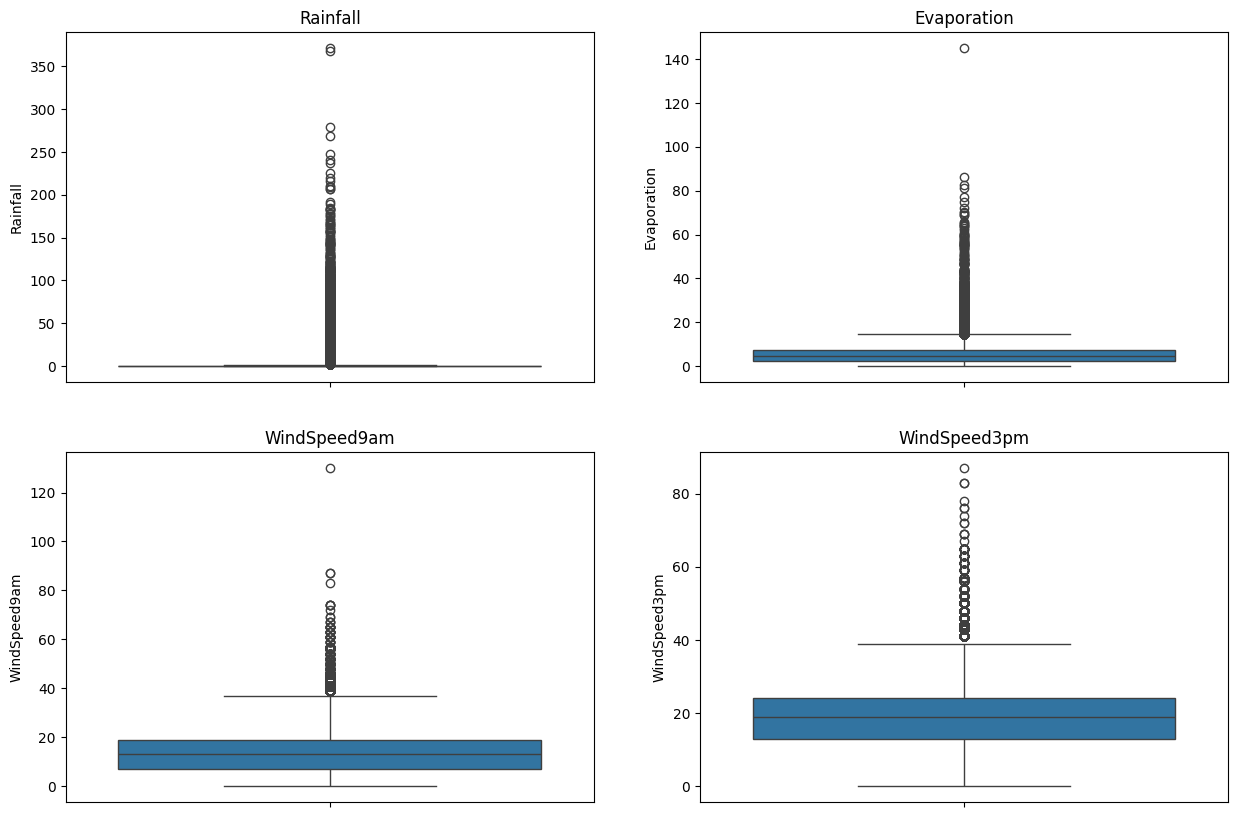

In [62]:
# draw boxplots to visualize outliers
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = sns.boxplot(df['Rainfall'])
plt.title('Rainfall')

plt.subplot(2,2,2)
fig = sns.boxplot(df['Evaporation'])
plt.title('Evaporation')

plt.subplot(2,2,3)
fig = sns.boxplot(df['WindSpeed9am'])
plt.title('WindSpeed9am')

plt.subplot(2,2,4)
fig = sns.boxplot(df['WindSpeed3pm'])
plt.title('WindSpeed3pm')


The above boxplots confirm that there are alot of outliers in these variables.

### Check the distribution of variables
* Now, lets plot the histogram to check distributinos to find out if they are normal or skewed.
* If the variable follows normal distribution, then we will do EXTREME VALUE ANALYSIS otherwise if they are skewed, We will find IQR (Interquantile range).

Text(0, 0.5, 'RainTomorrow')

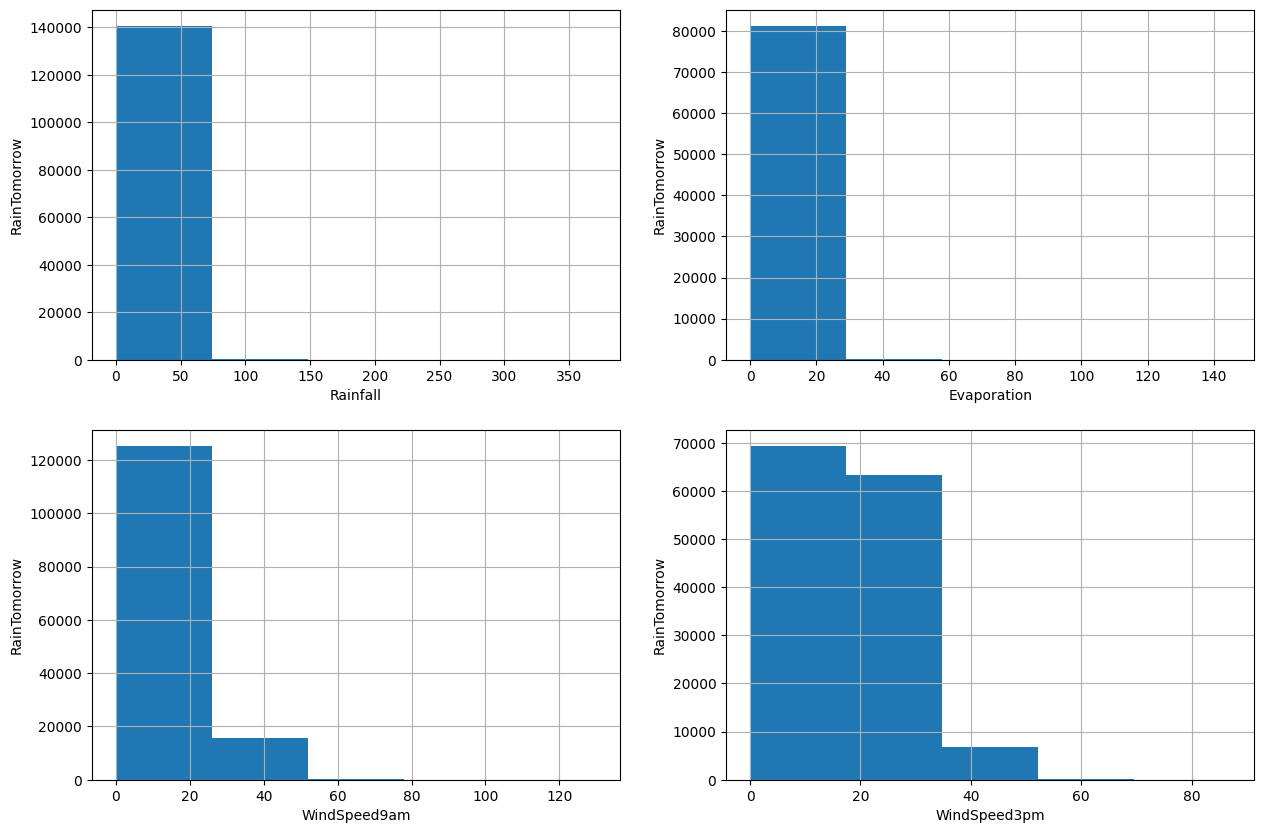

In [63]:
# Plot histogram to check distribution
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
fig = df.Rainfall.hist(bins=5)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,2)
fig = df.Evaporation.hist(bins=5)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,3)
fig = df.WindSpeed9am.hist(bins=5)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2,2,4)
fig = df.WindSpeed3pm.hist(bins=5)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')



We can see that all the four variables are skewed. SO, we will use Interquantile range to find outliers.

In [64]:
# Find outliers for Rainfall variables

IQR = df['Rainfall'].quantile(0.75) - df['Rainfall'].quantile(0.25)
Lower_fence = df['Rainfall'].quantile(0.25) - (3*IQR)
Upper_fence = df['Rainfall'].quantile(0.75) + (3*IQR)

print('Rainfall outliers are values {lowerbound} or {upperbound}'.format(lowerbound = Lower_fence, upperbound = Upper_fence))


Rainfall outliers are values -2.4000000000000004 or 3.2


For Rainfall, the minimum and maximum values are 0.0 and 371.0, So, the outliers are values >3.2

In [65]:
# Finding outliers for Evaporation variable

IQR = df['Evaporation'].quantile(0.75) - df['Evaporation'].quantile(0.25)
Lower_fence = df['Evaporation'].quantile(0.25) - (3*IQR)
Upper_fence = df['Evaporation'].quantile(0.75)  + (3*IQR)
print('Evaporation outliers are values {lowerbound} or {upperbound}'.format(lowerbound = Lower_fence, upperbound = Upper_fence))

Evaporation outliers are values -11.800000000000002 or 21.800000000000004


For Evaporation, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values>21.8

In [66]:
# Find outliers for Windspeed9am variable

IQR = df['WindSpeed9am'].quantile(0.75) - df['WindSpeed9am'].quantile(0.25)
Lower_fence = df['WindSpeed9am'].quantile(0.25) - (3*IQR)
Upper_fence = df['WindSpeed9am'].quantile(0.75) + (3*IQR)
print('WindSpeed9am outliers are values {lowerbound} or {upperbound}'.format(lowerbound = Lower_fence, upperbound = Upper_fence))

WindSpeed9am outliers are values -29.0 or 55.0


For windspeed9am, the minimum and maximum values are 0.0 and 130.o. So, the outliers are values >55.0

In [67]:
# Find outliers for WInspeed3pm variable

IQR = df['WindSpeed3pm'].quantile(0.75) - df['WindSpeed3pm'].quantile(0.25)
Lower_fence = df['WindSpeed3pm'].quantile(0.25) - (3*IQR)
Upper_fence = df['WindSpeed3pm'].quantile(0.75) + (3*IQR)
print('WindSpeed3pm outliers are values {lowerbound} or {upperbound}'.format(lowerbound = Lower_fence, upperbound = Upper_fence))

WindSpeed3pm outliers are values -20.0 or 57.0


For windspeed3pm the min and max values are 0.0 and 87.0. So,the outliers are values > 57.0

### Multivariate Analysis
* An important step in EDA is to discover patterns and relationships between variables in the dataset.
* We will use heat map and pair plot to discover the patterns and relationships in the dataset.
* First of all, Lets draw a heatmap.

In [68]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008.0,12.0,1.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008.0,12.0,2.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008.0,12.0,3.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008.0,12.0,4.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,NaN,NaN,9.4,20.9,No,0.0,No,2017.0,6.0,20.0
142189,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,NaN,NaN,10.1,22.4,No,0.0,No,2017.0,6.0,21.0
142190,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,NaN,NaN,10.9,24.5,No,0.0,No,2017.0,6.0,22.0
142191,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,NaN,NaN,12.5,26.1,No,0.0,No,2017.0,6.0,23.0


In [69]:
df[numerical].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743,0.039245,-0.204279,0.001507
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208,0.058388,-0.164622,-0.000495
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557,-0.009284,-0.030863,0.001134
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498,0.084141,-0.027912,-0.007770
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973,0.011678,0.023885,-0.001173
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923,-0.032708,0.060918,-0.009226
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404,-0.021620,0.051039,-0.009183
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240,-0.032806,0.061006,-0.009969
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417,0.010708,-0.090564,0.015610
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183,-0.009150,-0.018541,0.013207


<Axes: title={'center': 'Correlation Heatmap'}>

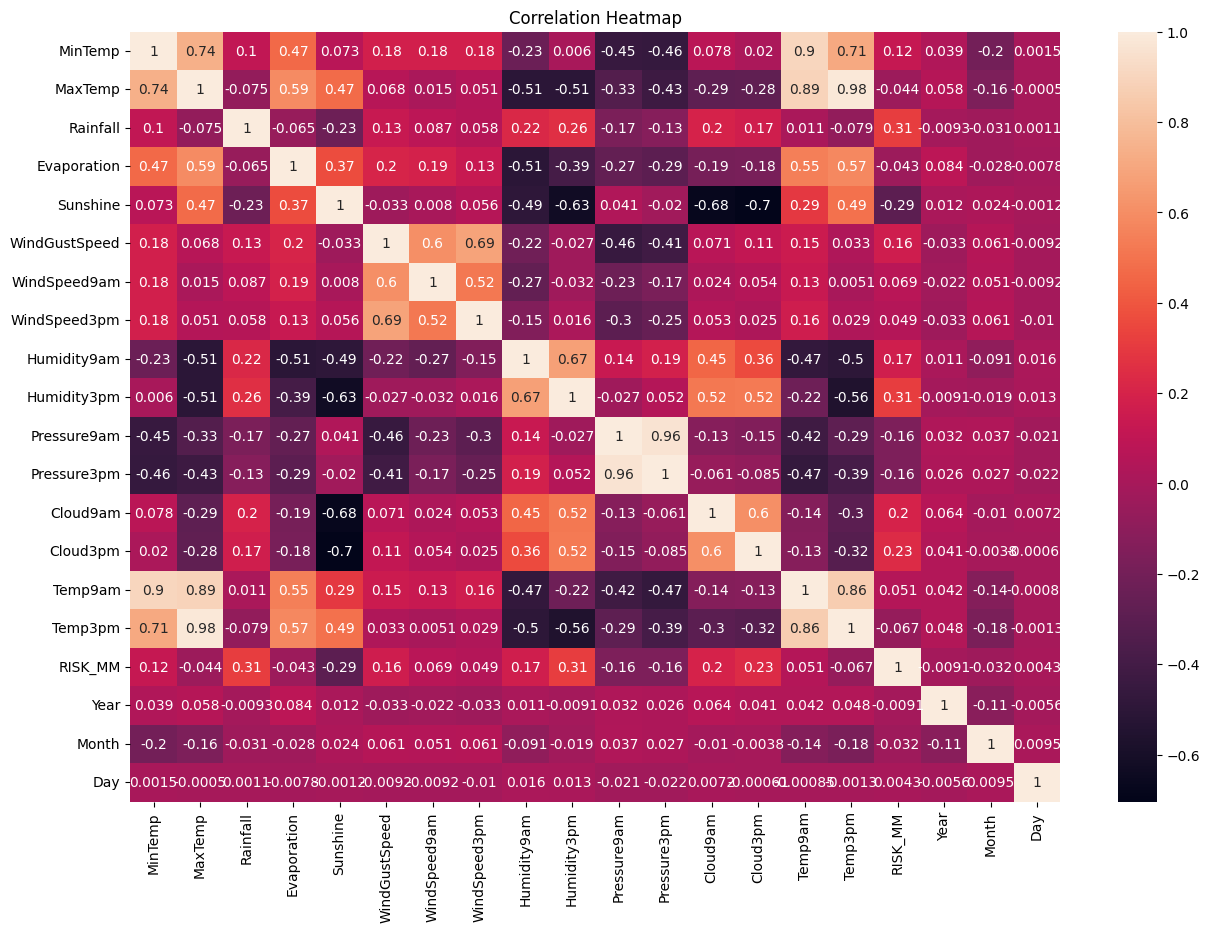

In [70]:
plt.figure(figsize = (15,10))
plt.title("Correlation Heatmap")
sns.heatmap(df[numerical].corr(), annot = True)

### Interpretation
From the above correlation heat map, we can conclude that:-
* MinTemp and MaxTemp variables are highly positively correlated(correlation coefficient = 0.75)
* MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient  = 0.90)
*

### Pair Plot
First of all, Lets define extract the varibales which are highly positively correlated.

In [71]:
num_var = ['MinTemp','MaxTemp','Temp3pm','Temp9am',"WindGustSpeed",'WindSpeed3pm','Pressure9am',"Pressure3pm"]

Now, lets draw pairplot to depict relationship between these variables.

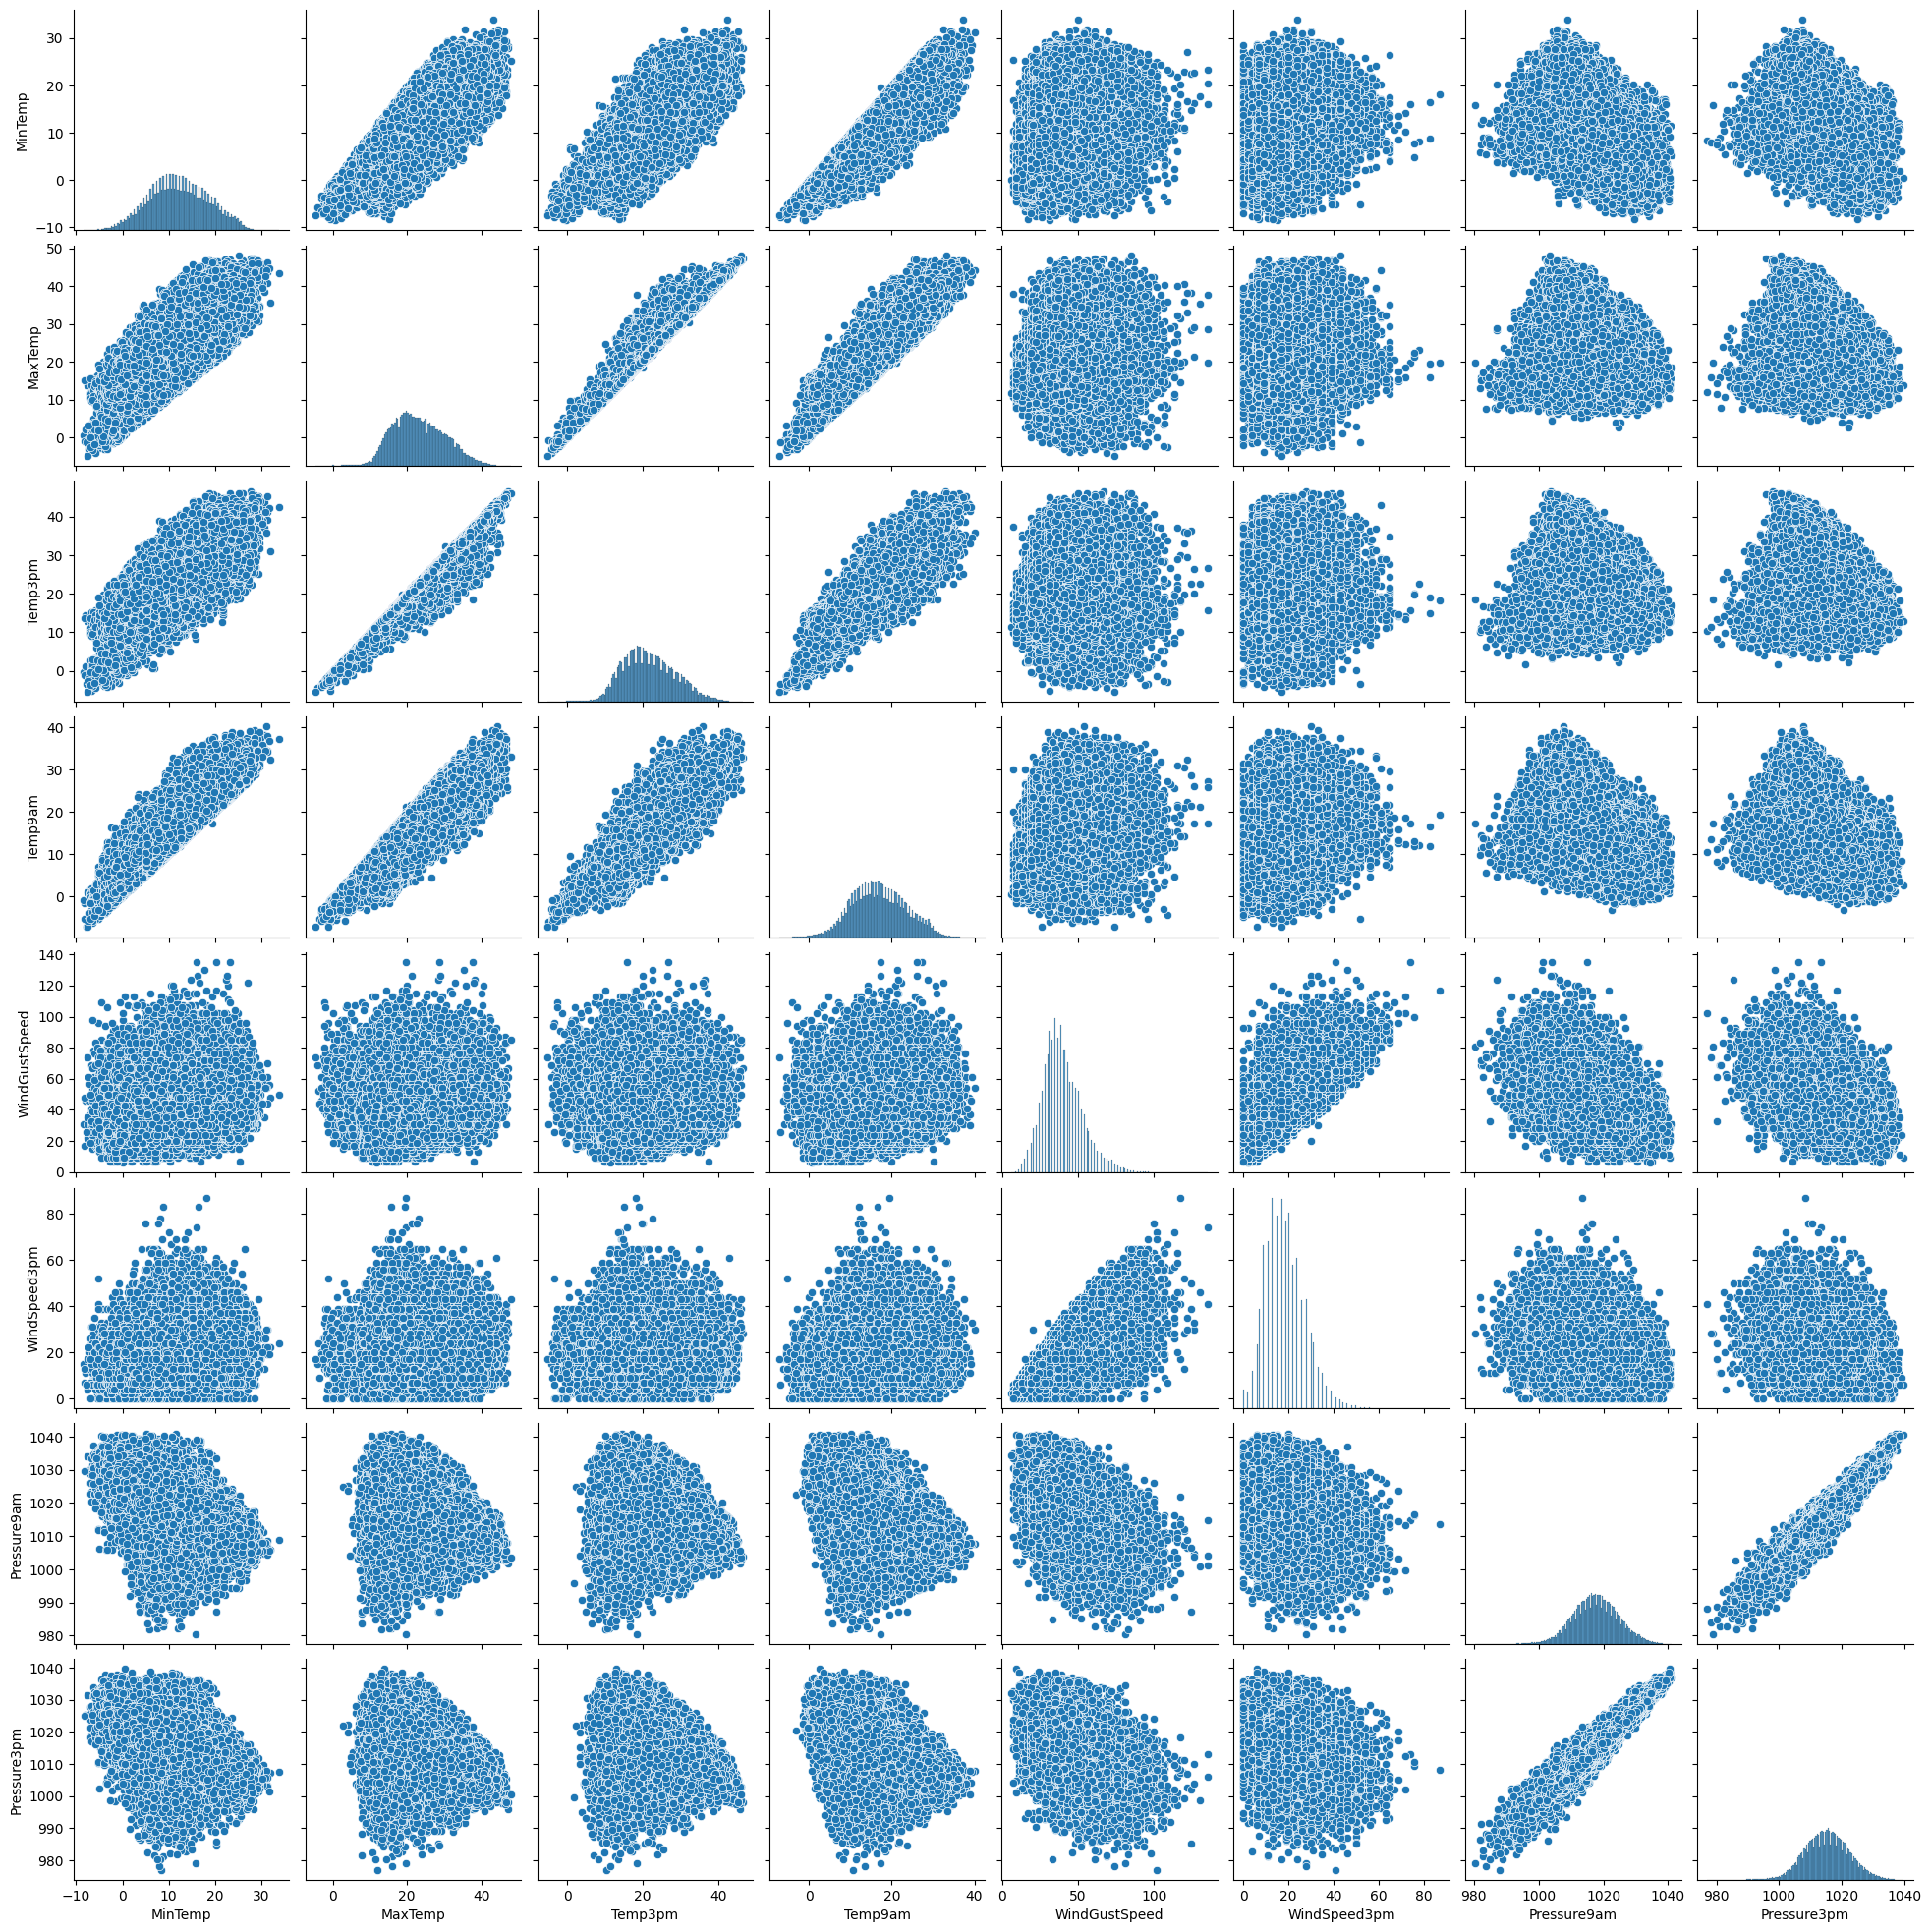

In [72]:
sns.pairplot(df[num_var])
plt.show()

# ??? HOw to read the heat map and pair plot...??

## 8. Declare feature vector and target variable

In [73]:
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

## 9. Split data into separate training and test set

In [74]:
# Split X and Y into training and traingin sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [75]:
# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((113754, 25), (28439, 25))

## 10. Feature Engineering
 Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. Lets carry out feature engineering on different types of variables

 First, Lets Display the categorical and numerical variables again separately.

In [76]:
X_train.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [77]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'object']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'object']
print(categorical)
print(numerical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM', 'Year', 'Month', 'Day']


## Engineering missing values in numerical variables

In [78]:
X_train[numerical].isna().sum()

,0
MinTemp,495
MaxTemp,264
Rainfall,1139
Evaporation,48718
Sunshine,54314
WindGustSpeed,7367
WindSpeed9am,1086
WindSpeed3pm,2094
Humidity9am,1449
Humidity3pm,2890


In [79]:
X_test[numerical].isna().sum()

,0
MinTemp,142
MaxTemp,58
Rainfall,267
Evaporation,12125
Sunshine,13502
WindGustSpeed,1903
WindSpeed9am,262
WindSpeed3pm,536
Humidity9am,325
Humidity3pm,720


Engineering missing values in the numerical variable for training set

In [80]:
for col in numerical:
  if X_train[col].isna().sum()>0:
    print(col,round(X_train[col].isna().mean(),4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


## Assumption
I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [81]:
for df1 in [X_train,X_test]:
  for col in numerical:
    col_median = df1[col].median()
    df1.fillna({col:col_median},inplace = True)

In [82]:
X_train[numerical].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [83]:
X_test[numerical].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


Now, we can see that there are no missing values in the numerical columns of training and test set.

## Engineering Missing values in categorical variables

In [84]:
X_train[categorical].isna().sum()

,0
Location,0
WindGustDir,7407
WindDir9am,7978
WindDir3pm,3008
RainToday,1139


In [85]:
X_test[categorical].isna().sum()

,0
Location,0
WindGustDir,1923
WindDir9am,2035
WindDir3pm,770
RainToday,267


In [86]:
for df2 in [X_train, X_test]:
  for col in categorical:
    col_mode = X_train[col].mode()[0]
    df2.fillna({col:col_mode},inplace = True)

In [87]:
X_train[categorical].isna().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [88]:
X_test[categorical].isna().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [89]:
X_train.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [90]:
X_test.isna().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


Now, there aren't any missing values in X_train and X_test as we have replace the numerical cols with the mean of the respective col of the X_train dataset and categorial cols with the mode of the respective col of the X_test dataset.

## Engineering outliers in numerical variables.
We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. Lets remove them using top-coding approach to cap maximum values using the upper bound from the iqr approach.

In [91]:
def max_value(df3, variable,top):
  return np.where(df3[variable]>top,top,df3[variable])
for df3 in [X_train,X_test]:
  df3['Rainfall'] = max_value(df3,'Rainfall',3.2)
  df3['Evaporation'] = max_value(df3,'Evaporation',21.8)
  df3['WindSpeed9am'] = max_value(df3,'WindSpeed9am',55)
  df3['WindSpeed3pm'] = max_value(df3,'WindSpeed3pm',57)

In [92]:
#(X_train[X_train["Rainfall"]<1.8].Rainfall).value_counts() --->when we implement an instruction on the col we automatically specify all the values in the col

In [93]:
X_train.describe(include = "all")

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
count,113754,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754,113754.000000,113754,113754,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754,113754.000000,113754.000000,113754.000000,113754.000000
unique,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,...,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
freq,2732,NaN,NaN,NaN,NaN,NaN,15302,NaN,17094,11558,...,NaN,NaN,NaN,NaN,NaN,88613,NaN,NaN,NaN,NaN
mean,NaN,12.193497,23.237216,0.675080,5.151606,8.041154,NaN,39.884074,NaN,NaN,...,1015.241101,4.651801,4.703588,16.995062,21.688643,NaN,2.360511,2012.759727,6.404021,15.710419
std,NaN,6.388279,7.094149,1.183837,2.823707,2.769480,NaN,13.116959,NaN,NaN,...,6.675168,2.292726,2.117847,6.463772,6.855649,NaN,8.493331,2.540419,3.427798,8.796821
min,NaN,-8.200000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000,2007.000000,1.000000,1.000000
25%,NaN,7.600000,18.000000,0.000000,4.000000,8.200000,NaN,31.000000,NaN,NaN,...,1011.000000,3.000000,4.000000,12.300000,16.700000,NaN,0.000000,2011.000000,3.000000,8.000000
50%,NaN,12.000000,22.600000,0.000000,4.800000,8.500000,NaN,39.000000,NaN,NaN,...,1015.200000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000,2013.000000,6.000000,16.000000
75%,NaN,16.800000,28.200000,0.600000,5.400000,8.700000,NaN,46.000000,NaN,NaN,...,1019.400000,6.000000,6.000000,21.500000,26.300000,NaN,0.800000,2015.000000,9.000000,23.000000


We can see that teh outliers in Rainfall, Evaporation, WindSpeed9am, and Windspeed3pm clumns are capped

## Encode categorical varibales

In [94]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [95]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
110803,Witchcliffe,S,SSE,S,No
87289,Cairns,ENE,SSE,SE,Yes
134949,AliceSprings,E,NE,N,No
85553,Cairns,ESE,SSE,E,No
16110,Newcastle,W,N,SE,No


In [96]:
!pip install category_encoders

In [97]:
# encoding RainToday Variable
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = ['RainToday'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [98]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RISK_MM,Year,Month,Day
110803,Witchcliffe,13.9,22.6,0.2,4.8,8.5,S,41.0,SSE,S,...,5.0,5.0,18.8,20.4,0,1,0.0,2014.0,4.0,25.0
87289,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,7.0,5.0,26.4,27.5,1,0,0.0,2015.0,11.0,2.0
134949,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1.0,1.0,28.5,35.0,0,1,0.0,2014.0,10.0,19.0
85553,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,2.0,3.0,27.3,29.4,0,1,0.0,2010.0,10.0,30.0
16110,Newcastle,16.8,29.2,0.0,4.8,8.5,W,39.0,N,SE,...,5.0,8.0,22.2,27.0,0,1,3.6,2012.0,11.0,8.0


We can see that two additional varibales RainToday_0 and RainToday_1 are created from RainToday variable using binary Encoding.
Now , lets create the final X_train training set by using one-hot encoding to the other columns.

In [99]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

We could have done one hot encoding to raintoday as well

In [102]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
110803,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,False,False,True,False,False,False,False,False,False,False
87289,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,False,False,False,True,False,False,False,False,False,False
134949,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,False,False,False,False,False,False,False,False,False,False
85553,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,False,False,False,False,False,False,False,False,False,False
16110,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,False,False,False,True,False,False,False,False,False,False


Similarly, Lets create X_test testing set


In [108]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [110]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
86232,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,False,False,False,False,False,False,False,False,False,False
57576,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,False,False,True,False,False,False,False,False,False,False
124071,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,False,False,False,False,True,False,False,False,False,False
117955,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,False,False,False,False,False,False,True,False,False,False
133468,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,False,False,False,False,False,False,False,False,False,False


We have now training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.
## 11. Feature Scaling

In [111]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,Year,Month,Day,RainToday_0,RainToday_1
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,4.651801,4.703588,16.995062,21.688643,2.360511,2012.759727,6.404021,15.710419,0.221012,0.778988
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,2.292726,2.117847,6.463772,6.855649,8.493331,2.540419,3.427798,8.796821,0.414930,0.414930
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,3.000000,4.000000,12.300000,16.700000,0.000000,2011.000000,3.000000,8.000000,0.000000,1.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,6.000000,6.000000,21.500000,26.300000,0.800000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,9.000000,8.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000,1.000000,1.000000
